In [1]:
import numpy as np
import pandas as pd
import glob
import os  
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import seaborn as sns

import keras
from keras import initializers
from keras.models import Sequential
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize

from keras import models
from keras.models import load_model
from keras.layers import Dropout
from keras.layers import BatchNormalization

from keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adadelta, Nadam
# from adabound import AdaBound

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.np_utils import to_categorical

from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
path, dirs, files = next(os.walk(r"C:\\Users\\Tony\\Desktop\\Summer\\Nerthus\\dataset"))
dirs

['BBPS_0', 'BBPS_1', 'BBPS_2', 'BBPS_3']

In [3]:
class_label = ['BBPS_0', 'BBPS_1', 'BBPS_2', 'BBPS_3']

In [4]:
# Read in the default dataset
i = 0

X_data = []
Y_data = []

for bbps in class_label:
    files = glob.glob (r"C:\\Users\\Tony\\Desktop\\Summer\\Nerthus\\dataset\\" + str(bbps) + "/*.jpg")
    
    for myFile in files:
      img = Image.open(myFile)
      #img.thumbnail((width, height), Image.ANTIALIAS) # resizes image in-place keeps ratio
      img = img.resize((128,128), Image.ANTIALIAS) # resizes image without ratio
      img = np.array(img)

      if img.shape == (128, 128, 3):
        # Add the numpy image to matrix with all data
        X_data.append (img)
        Y_data.append (i)
        
    i += 1

Total Number of Samples:  5525
Number of Samples per Class:
BBPS_0 : 500
BBPS_1 : 2700
BBPS_2 : 975
BBPS_3 : 1350


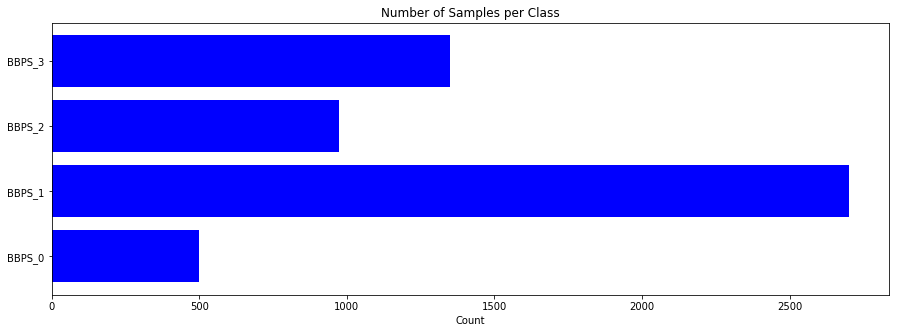

In [5]:
X = np.array(X_data)
Y = np.array(Y_data)
y_cat = to_categorical(Y_data, len(class_label))
# Print shapes to see if they are correct
# print(X.shape)
# print(Y.shape)

number_classes = [0,0,0,0]

for i in range(len(Y)):
    if (Y[i] == 0):
        number_classes[0] += 1
    elif (Y[i] == 1):
        number_classes[1] += 1
    elif (Y[i] == 2):
        number_classes[2] += 1
    elif (Y[i] == 3):
        number_classes[3] += 1

print("Total Number of Samples: ", len(X))
print("Number of Samples per Class:")  

for i in range(len(class_label)):
     print(class_label[i], ":", number_classes[i])

objects = class_label
y_pos = np.arange(len(objects))
samples = number_classes

plt.figure(figsize=[15,5])
plt.barh(y_pos, samples, align='center', color='b')
plt.xlabel('Count')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class')

plt.show()

In [6]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y_cat, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.2)

X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Number of Samples Train:  4420
Number of Samples Validation:  884
Number of Samples Test:  221


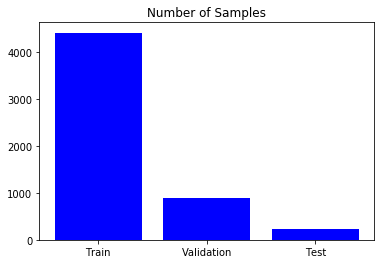

In [7]:
objects = ('Train', 'Validation', 'Test')
y_pos = np.arange(len(objects))
samples = []

samples.append(len(X_train))
samples.append(len(X_val))
samples.append(len(X_test))

print("Number of Samples Train: ", samples[0]) 
print("Number of Samples Validation: ", samples[1]) 
print("Number of Samples Test: ", samples[2]) 

plt.bar(y_pos, samples, align='center', color='b')
plt.xticks(y_pos, objects)
plt.title('Number of Samples')

plt.show()

Samples for Training set:
BBPS_0 : 384
BBPS_1 : 2153
BBPS_2 : 788
BBPS_3 : 1095


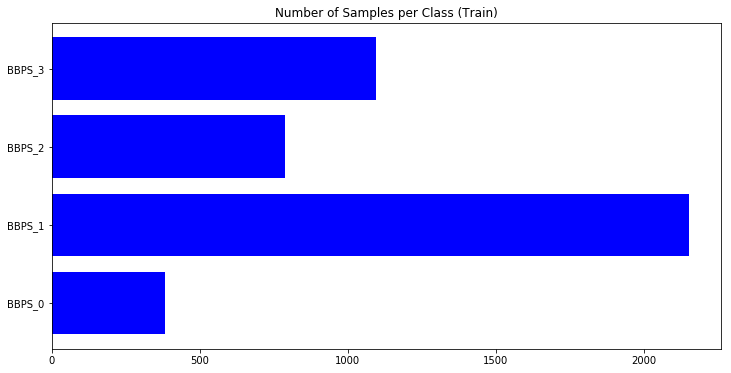

Samples for Validation set:
BBPS_0 : 94
BBPS_1 : 441
BBPS_2 : 149
BBPS_3 : 200


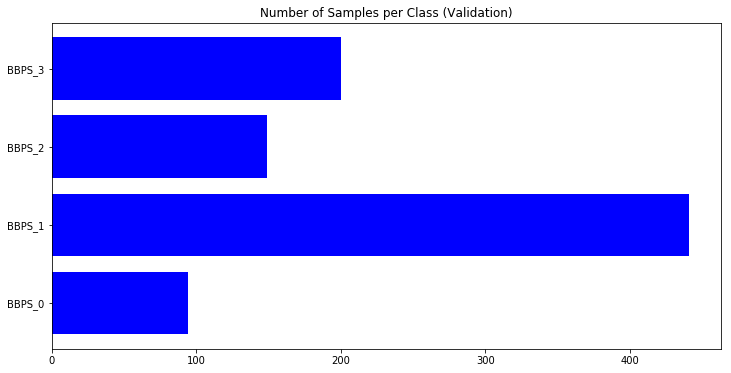

Samples for Testing set:
BBPS_0 : 22
BBPS_1 : 106
BBPS_2 : 38
BBPS_3 : 55


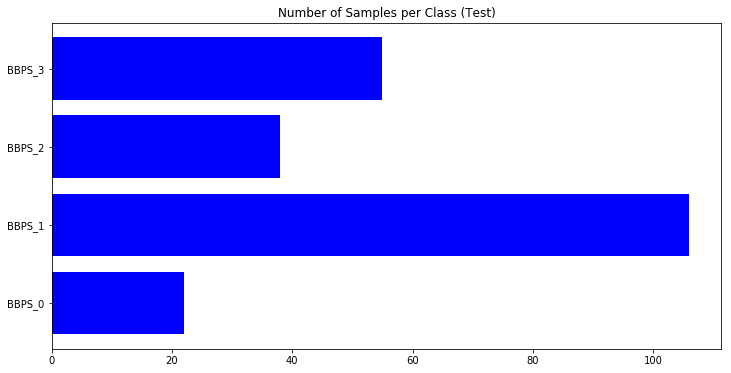

In [8]:
split_classes_train = [0,0,0,0]
split_classes_val = [0,0,0,0]
split_classes_test = [0,0,0,0]

for i in range(len(y_train)):
    for j in range(len(class_label)):
            if (y_train[i][j] == 1):
                split_classes_train[j] += 1
                
for i in range(len(y_val)):
    for j in range(len(class_label)):
            if (y_val[i][j] == 1):
                split_classes_val[j] += 1
                
for i in range(len(y_test)):
    for j in range(len(class_label)):
            if (y_test[i][j] == 1):
                split_classes_test[j] += 1
                
objects = class_label
y_pos = np.arange(len(objects))

print("Samples for Training set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_train[i])

samples_train = split_classes_train
samples_val = split_classes_val
samples_test = split_classes_test

#Train Samples
plt.figure(figsize=[12,6])
plt.barh(y_pos, samples_train, align='center', color='b')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class (Train)')
plt.show()

print("Samples for Validation set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_val[i])

#Validation Samples
plt.figure(figsize=[12,6])
plt.barh(y_pos, samples_val, align='center', color='b')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class (Validation)')
plt.show()

print("Samples for Testing set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_test[i])

#Test Samples
plt.figure(figsize=[12,6])
plt.barh(y_pos, samples_test, align='center', color='b')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class (Test)')
plt.show()

In [9]:
train_datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
        )

validation_datagen = ImageDataGenerator(width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True)

test_datagen = ImageDataGenerator()

In [10]:
#Regular SMOTE Oversampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train.reshape(X_train.shape[0], -1), y_train)
X_val_res, y_val_res = sm.fit_sample(X_val.reshape(X_val.shape[0], -1), y_val)

X_train_res = X_train_res.reshape(X_train_res.shape[0], 128, 128, 3)
X_val_res = X_val_res.reshape(X_val_res.shape[0], 128, 128, 3)

In [11]:
train_datagen.fit(X_train_res)
validation_datagen.fit(X_val_res)
test_datagen.fit(X_test)

train_generator = train_datagen.flow(X_train_res, y_train_res, batch_size=32)
validation_generator = validation_datagen.flow(X_val_res, y_val_res, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

Samples for Training set:
BBPS_0 : 2153
BBPS_1 : 2153
BBPS_2 : 2153
BBPS_3 : 2153


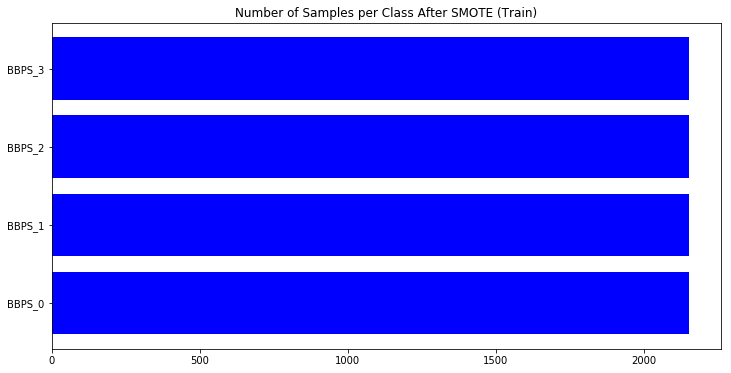

Samples for Validation set:
BBPS_0 : 441
BBPS_1 : 441
BBPS_2 : 441
BBPS_3 : 441


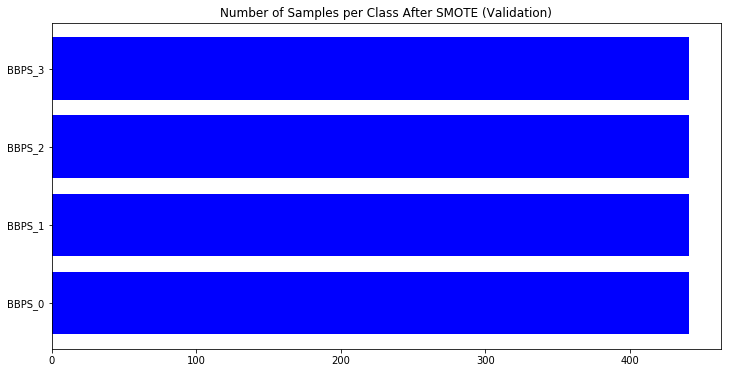

In [12]:
split_classes_train = [0,0,0,0]
split_classes_val = [0,0,0,0]
split_classes_test = [0,0,0,0]

for i in range(len(y_train_res)):
    for j in range(len(class_label)):
            if (y_train_res[i][j] == 1):
                split_classes_train[j] += 1
                
for i in range(len(y_val_res)):
    for j in range(len(class_label)):
            if (y_val_res[i][j] == 1):
                split_classes_val[j] += 1
                
objects = class_label
y_pos = np.arange(len(objects))

print("Samples for Training set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_train[i])

samples_train = split_classes_train
samples_val = split_classes_val
samples_test = split_classes_test

#Train Samples
plt.figure(figsize=[12,6])
plt.barh(y_pos, samples_train, align='center', color='b')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class After SMOTE (Train)')
plt.show()

print("Samples for Validation set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_val[i])

#Validation Samples
plt.figure(figsize=[12,6])
plt.barh(y_pos, samples_val, align='center', color='b')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class After SMOTE (Validation)')
plt.show()

In [13]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch >= 3:
        lr *= 1e-1
    elif epoch >= 9:
        lr *= 1e-1
    elif epoch >= 14:
        lr *= 1e-1
        
    print('Learning rate: ', lr)
    return lr

In [14]:
weight_decay = 0.0005

def block(x, width, stride, dropout):
    o1 = layers.BatchNormalization(axis=-1, 
                                   momentum=0.1, 
                                   epsilon=1e-5,  
                                   gamma_initializer='uniform')(x)
    o1 = layers.Activation('relu')(o1)
    y = layers.Conv2D(width,
                       kernel_size=(3, 3),
                       strides=(stride, stride),
                       padding='same',
                       kernel_initializer='glorot_uniform',
                       kernel_regularizer=keras.regularizers.l2(weight_decay),
                       use_bias=False)(o1)
    o2 = layers.BatchNormalization(axis=-1,
                            momentum=0.1,
                            epsilon=1e-5,
                            gamma_initializer='uniform')(y)
    if dropout > 0:
        o2 = layers.Dropout(dropout)(o2)
    o2 = layers.Activation('relu')(o2)
    z = layers.Conv2D(width,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      padding='same',
                      kernel_initializer='glorot_uniform',
                      kernel_regularizer=keras.regularizers.l2(weight_decay),
                      use_bias=False)(o2)
    if z.shape[-1] != x.shape[-1]:
        side_conv = layers.Conv2D(width,
                                  kernel_size=(3, 3),
                                  strides=(stride, stride),
                                  padding='same',
                                  kernel_initializer='glorot_uniform',
                                  kernel_regularizer=keras.regularizers.l2(weight_decay),
                                  use_bias=False)(o1)
        x = layers.Add()([z, side_conv])
    else:
        x = layers.Add()([z, x])

    return x

def group(x, n, width, stride, dropout):
    for i in range(n):
        x = block(x, width, stride if i ==0 else 1, dropout)
    return x

def wrn(input_shape, depth, width, num_classes, dropout):
    assert (depth - 4) % 6 == 0, 'depth should be 6n+4'
    n = (depth - 4) // 6
    widths = [int(v * width) for v in (16, 32)]

    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      padding='same',
                      kernel_initializer='glorot_uniform',
                      kernel_regularizer=keras.regularizers.l2(weight_decay),
                      use_bias=False)(inputs)
    for width, stride in zip(widths, [1, 2]):
        x = group(x, n, width, stride, dropout=dropout)

    x = layers.BatchNormalization(axis=-1,
                           momentum=0.1,
                           epsilon=1e-5,
                           gamma_initializer='uniform')(x)
    x = layers.Activation('relu')(x)
    x = layers.AveragePooling2D(pool_size=8)(x)
    y = layers.Flatten()(x)
    outputs = layers.Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='glorot_uniform')(y)


    # Instantiate model.
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

model = wrn(input_shape=(128, 128, 3), depth=16, width=1, num_classes=4, dropout=0.5)
print(model.summary())

opt = RMSprop(lr=lr_schedule(0))
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 432         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 16) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [15]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

lr_scheduler = LearningRateScheduler(lr_schedule)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.5e-6)

In [16]:
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=2*(len(X_train_res) // 32),
    epochs=15, 
    validation_steps=50,
    validation_data=validation_generator, 
    callbacks=[lr_scheduler, reduce_lr],
    verbose=1 )

model.save('model_Nerthus_RMSprop.h5')

Epoch 1/15
Learning rate:  0.001
538/538 [==============================] - 118s 219ms/step - loss: 0.5705 - acc: 0.7857 - val_loss: 0.3013 - val_acc: 0.9062
Epoch 2/15
Learning rate:  0.001
538/538 [==============================] - 101s 188ms/step - loss: 0.2848 - acc: 0.9104 - val_loss: 0.3355 - val_acc: 0.8912
Epoch 3/15
Learning rate:  0.001
538/538 [==============================] - 102s 189ms/step - loss: 0.2114 - acc: 0.9356 - val_loss: 0.2194 - val_acc: 0.9338
Epoch 4/15
Learning rate:  0.0001
538/538 [==============================] - 103s 191ms/step - loss: 0.1051 - acc: 0.9783 - val_loss: 0.0838 - val_acc: 0.9841
Epoch 5/15
Learning rate:  0.0001
538/538 [==============================] - 103s 192ms/step - loss: 0.0932 - acc: 0.9807 - val_loss: 0.0907 - val_acc: 0.9809
Epoch 6/15
Learning rate:  0.0001
538/538 [==============================] - 106s 198ms/step - loss: 0.0816 - acc: 0.9850 - val_loss: 0.0558 - val_acc: 0.9943
Epoch 7/15
Learning rate:  0.0001
538/538 [======

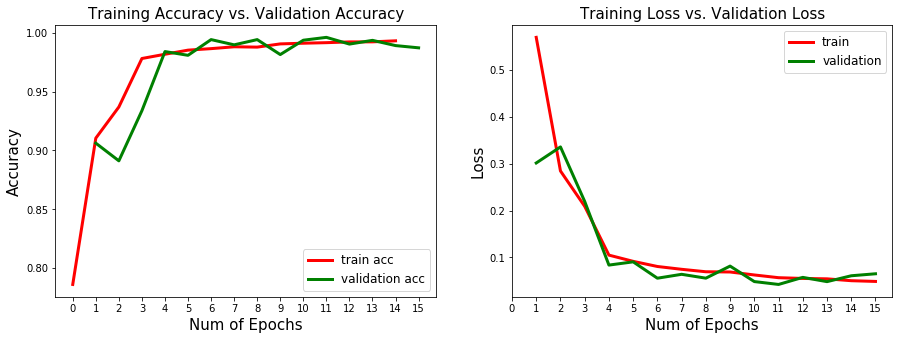

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 5))
  
# summarize history for accuracy
plt.subplot(1, 2 ,1)
plt.plot(np.arange(0, len(history.history['acc'])), acc, 'r', linewidth=3)
plt.plot(np.arange(1, len(history.history['val_acc'])+1), val_acc, 'g', linewidth=3)
plt.xticks(np.arange(0, 15+1, 1))
plt.title('Training Accuracy vs. Validation Accuracy', fontsize = 15)
plt.xlabel('Num of Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(['train acc', 'validation acc', 'train loss', 'validation loss'], loc='best', fontsize='large')
  
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(history.history['loss'])+1), history.history['loss'], 'r', linewidth=3)
plt.plot(np.arange(1, len(history.history['val_loss'])+1), history.history['val_loss'], 'g', linewidth=3)
plt.xticks(np.arange(0, 15+1, 1))
plt.title('Training Loss vs. Validation Loss', fontsize = 15)
plt.xlabel('Num of Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(['train', 'validation'], loc='best', fontsize='large')
  
plt.show()

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(len(acc)):
    acc[i] = '{:.4}'.format(acc[i])
    val_acc[i] = '{:.4}'.format(val_acc[i])
    loss[i] = '{:.4}'.format(loss[i])
    val_loss[i] = '{:.4}'.format(val_loss[i])
    
d = {'acc': acc, 'val_acc': val_acc, 
     'loss': loss, 'val_loss': val_loss}
df = pd.DataFrame(data=d)
print(df)

       acc val_acc     loss val_loss
0   0.7861  0.9062   0.5689   0.3013
1   0.9105  0.8912   0.2843   0.3355
2    0.937  0.9338    0.209   0.2194
3   0.9782  0.9841    0.105  0.08378
4   0.9818  0.9809  0.09177  0.09068
5   0.9853  0.9943   0.0808  0.05583
6   0.9866  0.9898   0.0748  0.06414
7   0.9882  0.9943  0.06958  0.05592
8   0.9879  0.9816  0.06908  0.08166
9   0.9906  0.9938  0.06275  0.04866
10  0.9912  0.9962  0.05692  0.04254
11  0.9917  0.9905  0.05532   0.0576
12  0.9923  0.9936  0.05448  0.04851
13  0.9924  0.9892  0.05052  0.06103
14  0.9932  0.9873  0.04896  0.06526


In [19]:
y_img_batch, y_class_batch = test_generator[0] 

for i in range(1,len(test_generator)):
    testX = test_generator[i][0]
    testY = test_generator[i][1]
    y_img_batch = np.concatenate((y_img_batch, testX))
    y_class_batch = np.concatenate((y_class_batch, testY))

y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)

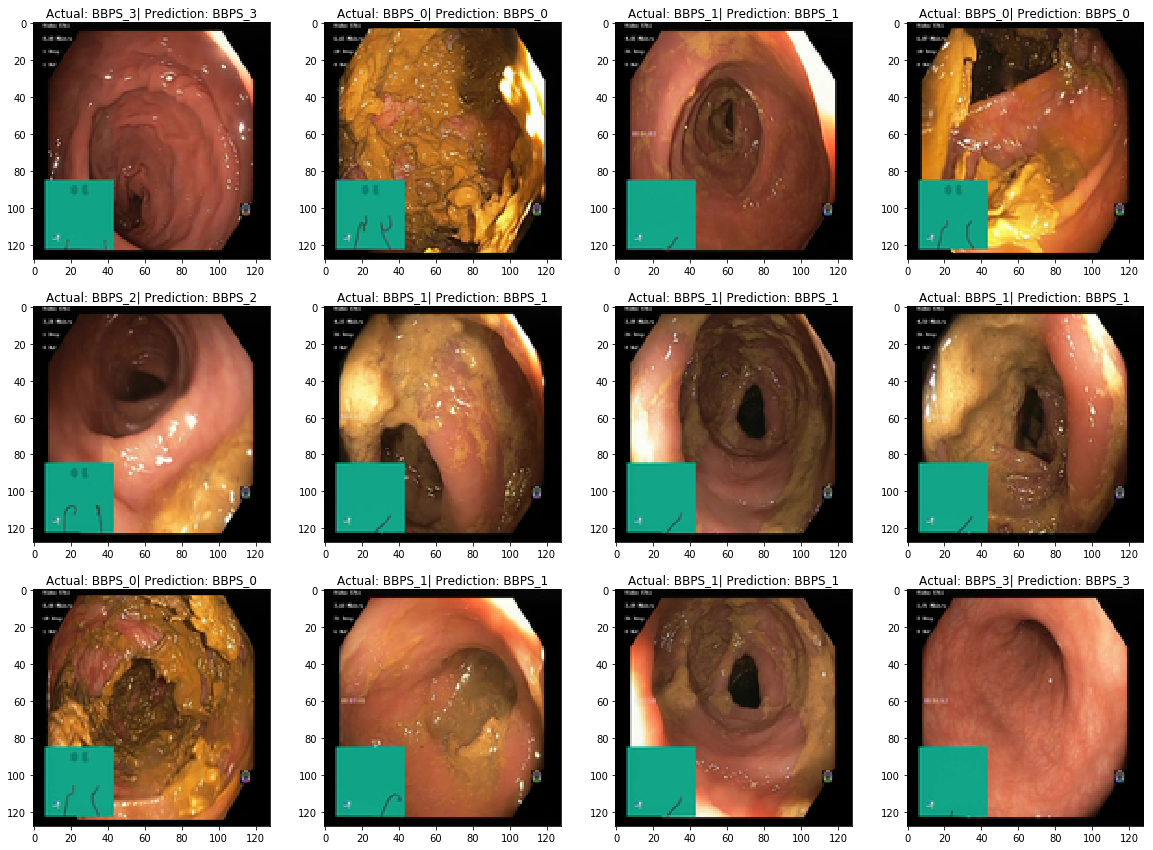

In [20]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow((y_img_batch[i]))
    actual_label = class_label[y_true[i]]
    predict_label = class_label[y_pred[i]]
    plt.title("Actual: " + actual_label + "| Prediction: " + predict_label)
plt.show()

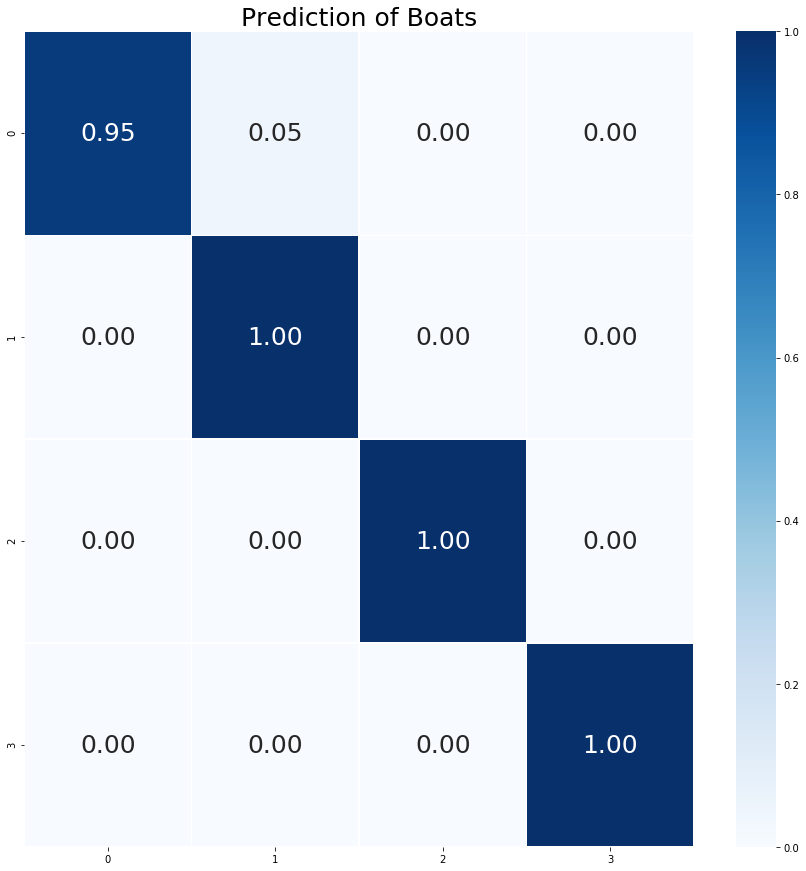

In [21]:
cm = confusion_matrix(y_true, y_pred) 
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15,15))
plt.title('Prediction of Boats', fontsize = 25)
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Blues", annot_kws={"size": 25})

In [22]:
print(classification_report(y_true, y_pred, target_names=class_label, digits=4))

              precision    recall  f1-score   support

      BBPS_0     1.0000    0.9545    0.9767        22
      BBPS_1     0.9907    1.0000    0.9953       106
      BBPS_2     1.0000    1.0000    1.0000        38
      BBPS_3     1.0000    1.0000    1.0000        55

    accuracy                         0.9955       221
   macro avg     0.9977    0.9886    0.9930       221
weighted avg     0.9955    0.9955    0.9954       221



In [23]:
from sklearn import preprocessing
from scipy import interp
from itertools import cycle

n_classes = len(class_label)
lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_true = lb.transform(y_true)
y_pred = lb.transform(y_pred)

lw = 5

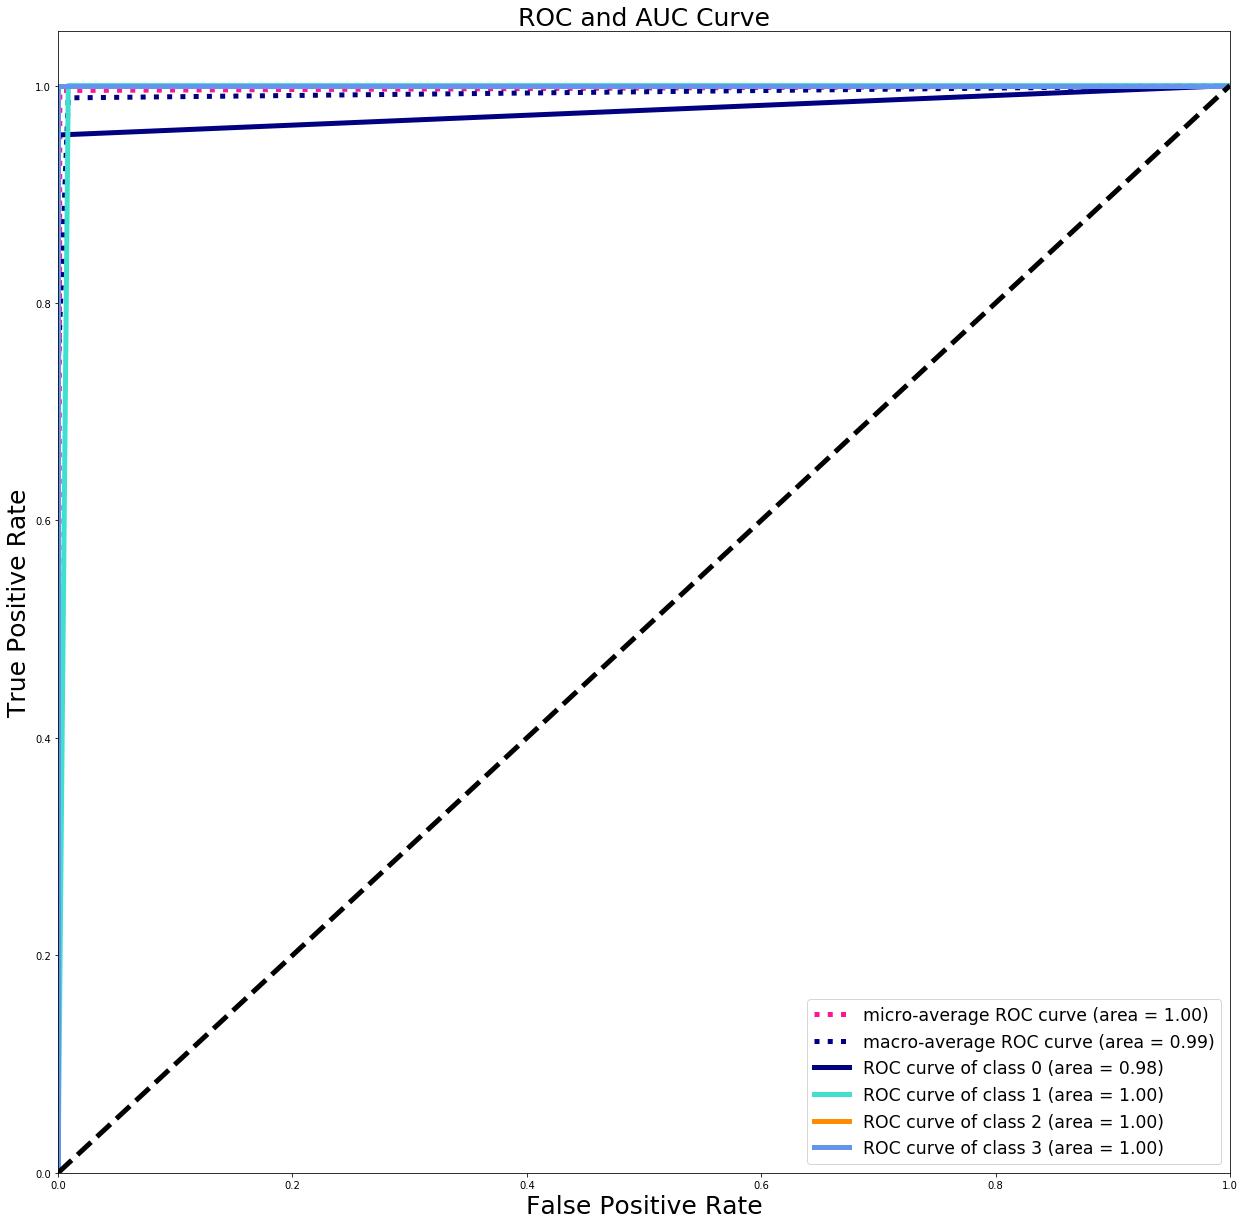

ROC_AUC_Score: 0.9932312252964427


In [24]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(21,21))
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=lw)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=lw)

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 25)
    plt.ylabel('True Positive Rate', fontsize = 25)
    plt.title('ROC and AUC Curve', fontsize = 25)
    plt.legend(loc="lower right",fontsize='xx-large')
    plt.show()
        
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC_AUC_Score:", multiclass_roc_auc_score(y_true, y_pred))

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
    
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_true, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.4f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.9921


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.9921')

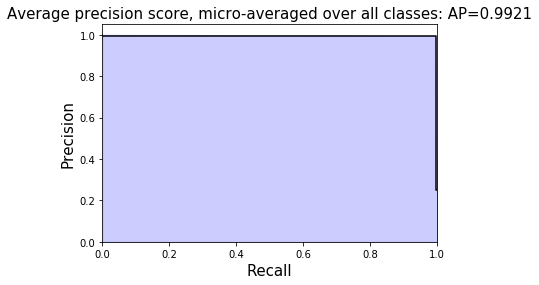

In [26]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='black', alpha=1.0,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='blue')#,
                 #**step_kwargs)

plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.4f}'
    .format(average_precision["micro"]), fontsize = 15)

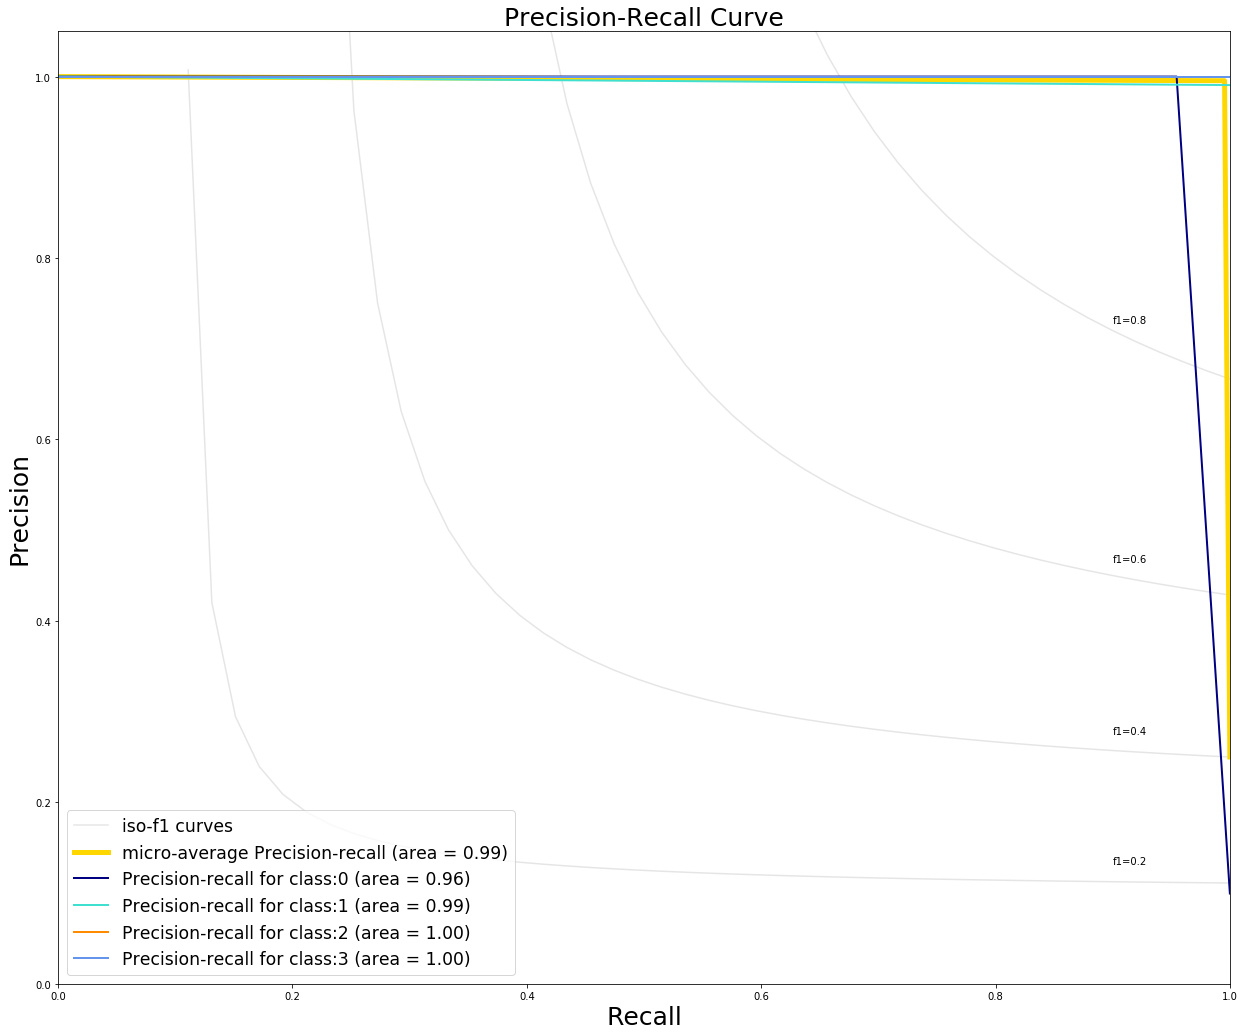

In [27]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])

plt.figure(figsize=(21, 21))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize = 25)
plt.ylabel('Precision', fontsize = 25)
plt.title('Precision-Recall Curve', fontsize = 25)
plt.legend(lines, labels, loc='lower left', fontsize='xx-large')


plt.show()